## Importing Necessary Libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%matplotlib inline

## Generating dataset

In [ ]:
def generate_data():
  X, y = make_classification(n_samples = 5000,
                             n_features = 2,
                             n_redundant = 0,
                             n_informative = 2,
                             random_state = 14,
                             n_clusters_per_class = 1)
  return X, y

X, y = generate_data()

In [ ]:
print(X)
print(y)

[[ 0.42165233 -0.06506637]
 [ 2.24762954 -2.67965165]
 [-0.7732556   1.14606175]
 ...
 [-0.15868599  1.59278   ]
 [ 0.70120236 -0.76082916]
 [-1.79473586  0.18071854]]
[1 1 0 ... 0 1 0]


## Estimating Probabilities

In order to estimate the probabilities of a particular instance using Logistic Regression algorithm, we will use Sigmoid Function. A sigmoid function is a mathematical function with a characteristic "S"-Shaped curve or sigmoid curve. It transforms any value in the domain to a number between 0 and 1.

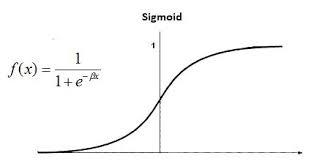

Then out Logistic Regression model estimated probability will be: Yhat = h(X) = a(Xθ)

In [10]:
def add_intercept(X):
  """Add an intercept (bias) term to the input features X. """
  intercept = np.ones((X.shape[0], 1))
  return np.concatenate((intercept, X), axis = 1)

def sigmoid(z):
  """ Calculate the sigmoid function of the input z. """
  return 1 / (1 + np.exp(-z))

def calc_h(X, theta):
  """ Calculate the hypothesis (Predicted probabilities) using the Sigmoid Function """
  z = np.dot(X, theta)
  h = sigmoid(z)
  return h

In [11]:
def gradient_descent(X, y, theta, alpha, num_iter):
  """ Perform gradient descent to optimize the logistic regression parameters """
  m = y.size
  cost_list = []

  for i in range(num_iter):
    h = calc_h(X, theta)
    cost = (-y * np.log(h) - (1-y) * np.log(1-h)).mean()
    cost_list.append(cost)

    gradient = np.dot(X.T, (h-y))/m
    theta -= alpha * gradient

    if i % 1000 == 0:
      print("Cost: {}".format(cost))
  return cost_list, theta

In [12]:
def logistic_regression(X, y, alpha = 0.01, num_iter = 100000):
  """ Perform Logistic regression on the given data and return the optimial parameters """
  XX = add_intercept(X)
  theta = np.zeros(XX.shape[1])

  cost_list, optimal_parameters = gradient_descent(XX, y, theta, alpha, num_iter)

  return (cost_list, optimal_parameters)

In [13]:
X, y = generate_data()
cost_list, optimal_parameters = logistic_regression(X, y)

Cost: 0.6931471805599454
Cost: 0.22067023904503671
Cost: 0.20258303402811645
Cost: 0.1971753153723922
Cost: 0.19491385577026268
Cost: 0.19381807559963452
Cost: 0.1932413052347451
Cost: 0.19292135272908112
Cost: 0.19273741092960564
Cost: 0.19262894251888815
Cost: 0.19256377940320243
Cost: 0.1925240840950413
Cost: 0.19249964631940025
Cost: 0.19248447910569466
Cost: 0.19247500629988443
Cost: 0.1924690609105696
Cost: 0.19246531504815823
Cost: 0.19246294782684475
Cost: 0.19246144825975395
Cost: 0.19246049652162026
Cost: 0.1924598915649235
Cost: 0.1924595065719104
Cost: 0.19245926132839664
Cost: 0.19245910498679059
Cost: 0.19245900525872986
Cost: 0.1924589416124632
Cost: 0.19245890097758653
Cost: 0.19245887502613482
Cost: 0.1924588584480609
Cost: 0.19245884785565617
Cost: 0.1924588410866353
Cost: 0.1924588367603611
Cost: 0.19245883399502445
Cost: 0.19245883222728266
Cost: 0.19245883109717635
Cost: 0.19245883037466635
Cost: 0.1924588299127245
Cost: 0.19245882961736788
Cost: 0.1924588294285171

In [14]:
print(optimal_parameters)

[ 0.48974995  2.04436201 -1.98411782]


## Plotting the cost function

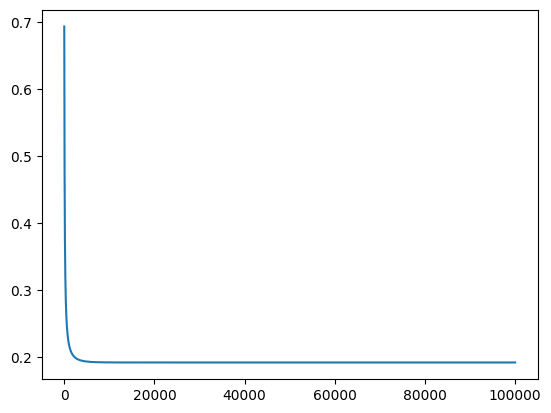

In [15]:
plt.plot(range(100000), cost_list)

##Decision Boundary

In [16]:
def plot_decision_boundary(X, y, theta):
  """ Plot the decision boundary and the data points. """
  plt.figure(figsize = (10, 6))

  x1_min, x1_max = X[:, 0].min(), X[:, 0].max(),
  x2_min, x2_max = X[:, 1].min(), X[:, 1].max(),
  xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
  grid = np.c_[xx1.ravel(), xx2.ravel()]

  grid = add_intercept(grid)
  probs = calc_h(grid, theta)
  probs = probs.reshape(xx1.shape)

  ax = plt.gca()
  plt.contourf(xx1, xx2, probs, levels = 25, cmap = plt.cm.twilight, alpha = 0.8)
  plt.contour(xx1, xx2, probs, [0.5], linewidths = 2, color = 'black')
  plt.scatter(X[:, 0], X[:, 1], c = y.ravel(), s = 40, cmap = plt.cm.twilight, edgecolors = 'black')
  plt.plot(-0.37, 0.19, 'bx', markersize = 20, markeredgewidth = 2)

  plt.xlabel("$X_1$")
  plt.ylabel("$X_2$")
  ax.set_xlim([x1_min, x1_max])
  ax.set_ylim([x2_min, x2_max])

  # Customize the plot style
  plt.title("Decision Boundary Plot", fontsize = 18)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.colorbar(label = "Probability")

  plt.show()

<ipython-input-16-bec0969af734>:16: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(xx1, xx2, probs, [0.5], linewidths = 2, color = 'black')


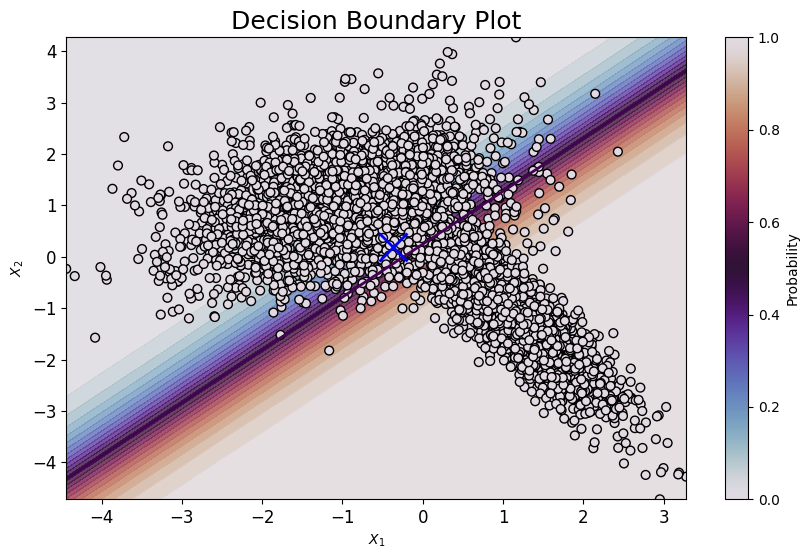

In [17]:
plot_decision_boundary(X, y,  optimal_parameters)

## Sklearn Implementation

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 1e20, solver = 'lbfgs')
model.fit(X, y)
preds = model.predict(X)

score_sklearn = (preds == y).mean()
print('Score Sklearn: {}'.format(score_sklearn))
print(model.intercept_, model.coef_)

Score Sklearn: 0.9274
[0.48975574] [[ 2.04435271 -1.98412729]]


## Assumption Testing

Assumption testing is an essential step in logistic regression to ensure the validity and reliability of the model's results.
These assumptions include the appropriate outcome type (categorical), linearity of independent variables and log odds, absence of strongly influential outliers, absence of multicollinearity, independence of observations, and a sufficient large sample size.

Assumption 1: Appropriate outcome type (Must be categorical)

Assumption 2: Linearity of independent variables and log odds

Assumption 3: No strongly influential outliers

Assumption 4: Absence of Multicollinearity

Assumption 5: Independence of observations

Assumption 6: Sufficiently large sample size

In [25]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from statsmodels.tools import add_constant
%matplotlib inline

def assumption_testing(X, y, theta):
  """ Perform assumption testing for logistic regression """
  XX = add_intercept(X)
  model = sm.Logit(y, XX).fit()

  # Assumption 2: Linearity of independent variables and log odds
  print("Assumptions 2 - Linearity of independent variables and Log odds:")
  print(model.summary())
  print('\n')

  # Assumption 3: No strongly influential outliers
  print("Assumptions 3 - No Strongly influential outliers:")
  pred_prob = model.predict(XX)
  leverage = np.sum(XX * (1 - XX), axis = 1) * pred_prob * (1 - pred_prob)
  cooks_d = (pred_prob - y) ** 2 / leverage
  print("Cook's Distance for each observations")
  print(cooks_d)
  print('\n')

  # Assumption 4: Absence of multicollinearity
  print("Assumptions 4 - Absence of multicollinearity")
  vif = [variance_inflation_factor(XX, i) for i in range(XX.shape[1])]
  print("variance_inflation_Factors:")
  print(vif)
  print('\n')

  # Assumption 4: Sufficiently large sample size
  print("Assumption 4: Sufficiently large sample size: ")
  print("Sample size:", len(y))

In [26]:
assumption_testing(X, y, optimal_parameters)

Optimization terminated successfully.
         Current function value: 0.192459
         Iterations 8
Assumptions 2 - Linearity of independent variables and Log odds:
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.7223
Time:                        18:48:12   Log-Likelihood:                -962.29
converged:                       True   LL-Null:                       -3465.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4897      0.067      7.349